Kevin Liu Project 1 Part 1

In [2]:
# Part 1 Step 1

In [3]:
import requests
import pandas
import numpy
from bs4 import BeautifulSoup
import datetime
import re
import matplotlib.pyplot as plt

#We get the website content
r = requests.get("https://cmsc320.github.io/files/top-50-solar-flares.html")

r.status_code

200

In [4]:
root = BeautifulSoup(r.content)
root.prettify()


'<!DOCTYPE html>\n<html class="fontawesome-i2svg-active fontawesome-i2svg-complete" lang="en">\n <head>\n  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>\n  <title>\n   Top 50 solar flares | Solar activity | SpaceWeatherLive.com\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/>\n  <meta content="On this page you will find an overview of the strongest solar flares since June 1996 together with links to more information in our archive and a v..." name="description"/>\n  <meta content="SpaceWeatherLive, Live, Aurora, Auroral activity, Aurora Australis, Aurora Borealis, northern lights, Solar wind, Kp-index, Space Weather, Space Weather Updates, Aurora forecast, Space Weather Alerts, Solar activity, Solar flares, Sunspots, Aurora alert, Auroral activity, The Sun, SDO, STEREO, EPAM, DSCOVR" name="keywords"/>\n  <!-- Facebook meta -->\n  <meta content="https://spaceweath

In [5]:
table = root.find("table") #we isolate and find table

In [6]:
pandas_df = pandas.read_html(str(table)) # table is an int!! so we have to turn to a string
pandas_df = pandas_df[0] #the actual grouping we want
pandas_df.columns = ["Number", "x_classification", "Date", "Region", "Start_Time", "Maximum_Time", "End_Time", "Movie"] #creating columns
pandas_df #result

#So for these segments of code I followed the general pattern to web scrape. I used requests to get the data, formatted it 
#to help more easily get it in a table form. This was just standard web scraping without many other things going on. 

,Number,x_classification,Date,Region,Start_Time,Maximum_Time,End_Time,Movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


In [7]:
#p1 step 2, data tidying

del pandas_df["Movie"] #deleting movie column
pandas_df

,Number,x_classification,Date,Region,Start_Time,Maximum_Time,End_Time
0,1,X28+,2003/11/04,486,19:29,19:53,20:06
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24
3,4,X17+,2005/09/07,808,17:17,17:40,18:03
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55
5,6,X10,2003/10/29,486,20:37,20:49,21:01
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10
8,9,X9,2006/12/05,930,10:18,10:35,10:45
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39


In [8]:
for i in pandas_df.index: #updating times, apparently iterrow is bad practice? should ask
    pandas_df.at[i,"Start_Time"] = pandas.to_datetime(pandas_df.at[i,"Start_Time"])
    pandas_df.at[i,"Maximum_Time"] = pandas.to_datetime(pandas_df.at[i,"Maximum_Time"])
    pandas_df.at[i,"End_Time"] = pandas.to_datetime(pandas_df.at[i,"End_Time"])

pandas_df

,Number,x_classification,Date,Region,Start_Time,Maximum_Time,End_Time
0,1,X28+,2003/11/04,486,2022-02-25 19:29:00,2022-02-25 19:53:00,2022-02-25 20:06:00
1,2,X20+,2001/04/02,9393,2022-02-25 21:32:00,2022-02-25 21:51:00,2022-02-25 22:03:00
2,3,X17.2+,2003/10/28,486,2022-02-25 09:51:00,2022-02-25 11:10:00,2022-02-25 11:24:00
3,4,X17+,2005/09/07,808,2022-02-25 17:17:00,2022-02-25 17:40:00,2022-02-25 18:03:00
4,5,X14.4,2001/04/15,9415,2022-02-25 13:19:00,2022-02-25 13:50:00,2022-02-25 13:55:00
5,6,X10,2003/10/29,486,2022-02-25 20:37:00,2022-02-25 20:49:00,2022-02-25 21:01:00
6,7,X9.4,1997/11/06,8100,2022-02-25 11:49:00,2022-02-25 11:55:00,2022-02-25 12:01:00
7,8,X9.3,2017/09/06,2673,2022-02-25 11:53:00,2022-02-25 12:02:00,2022-02-25 12:10:00
8,9,X9,2006/12/05,930,2022-02-25 10:18:00,2022-02-25 10:35:00,2022-02-25 10:45:00
9,10,X8.3,2003/11/02,486,2022-02-25 17:03:00,2022-02-25 17:25:00,2022-02-25 17:39:00


In [9]:
pandas_df = pandas_df.replace(to_replace = "-", value = numpy.nan)

#so for this data tidying section I used a lot of pandas functions to remove rows, convert specific columns to a specific type, or used replacement
#functions.

In [10]:
#part 1 step 3
#This one was a bit harder since the request didn't return a really clean html that could easily be turned into a table. I used prettify to try 
#and clean it up more easily, but I had to end up using other fucntions like find, spliting, and regex to isolate the code into a list where each
#element was a row from the html script. However, i wanted to easily convert it to a dataframe so I split it once again with spaces (with some minor
#modifications to make it split cleanly) 
r1 = requests.get("https://cmsc320.github.io/files/waves_type2.html")
r1

<Response [200]>

In [11]:
root1 = BeautifulSoup(r1.content)
root1.prettify()
root1

<html><body>
<h2>Wind/WAVES type II bursts and CMEs</h2>
<a href="waves_type2_description.htm">A Brief Description</a>
<pre>
NOTE: List includes DH type II bursts observed by Wind spacecraft, 
but after STEREO launch on Oct 2006 the start and end times and 
frequencies of bursts are determined using both Wind and STEREO 
observations

                DH Type II                       Flare                     CME                   
----------------------------------------   -----------------   --------------------------   Plots
Start            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        
(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) 
1997/04/01 14:00 04/01 14:15  <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c2rdif_waves.html">8000</a>  <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c3rdif_waves.html">4000</a>   S25E16  8026 M1.3   <a href="https://cdaw.gs

In [12]:
table1 = root1.find("pre") #obtained the majority of the table but have a lot of extra stuff. can cut out at 2nd ==== row

table1 = str(table1)
table1 = re.sub('<[^<]+?>', '', table1) # Use regex to remove the tags to make life easier down the line

tables = table1.split("\n") #using split by \n to put each data point as an element in a list 12-> 529 are the ones we need.
tables = tables[12:530]
pandas_df1 = [] #so now we split the element up by split function 
for list in tables: 
    values = list.split()[:14] #the actual split into 14 columns, without the tags, it splits perfectly
    pandas_df1.append(values) 
df2 = pandas.DataFrame(pandas_df1) 
df2.columns = columns = ["start_date", "start_time", "end_date", "end_time", "start_frequency", "end_frequency", "flare_location", "flare_region", "flare_classification <chr>", "cme_date <chr>", "cme_time <chr>", "cme_angle <chr>", "cme_width <chr>", "cme_speed <chr>"]
df2

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification <chr>,cme_date <chr>,cme_time <chr>,cme_angle <chr>,cme_width <chr>,cme_speed <chr>
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,09/05,04:54,14000,210,S10W12,12673,M5.5,09/04,20:12,Halo,360,1418
514,2017/09/06,12:05,09/07,08:00,16000,70,S08W33,12673,X9.3,09/06,12:24,Halo,360,1571
515,2017/09/10,16:02,09/11,06:50,16000,150,S09W92,-----,X8.3,09/10,16:00,Halo,360,3163
516,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252


In [13]:
#part 1 step 4
df2 = df2.replace(to_replace = "----", value = numpy.nan) #all this removes unknown values from flare region and helps us convert it to int to change to NaN
df2 = df2.replace(to_replace = "altr", value = numpy.nan)
df2 = df2.replace(to_replace = "DSF", value = numpy.nan)
df2 = df2.replace(to_replace = "EP", value = numpy.nan)
df2 = df2.replace(to_replace = "EP?", value = numpy.nan)
df2 = df2.replace(to_replace = "FILA", value = numpy.nan)
df2 = df2.replace(to_replace = "DIM", value = numpy.nan)
df2 = df2.replace(to_replace = "-----", value = numpy.nan)
df2 = df2.replace(to_replace = "????", value = numpy.nan)
df2 = df2.replace(to_replace = "--/--", value = numpy.nan)

df2["flare_region"] = pandas.to_numeric(df2["flare_region"])

#so for the second one with cme angle, first I have to go through and make a new column, its elements depend on whether cme angle is halo. 
# if it is a halo, it is true, other false. this column name is is_halo. 
#then use the replace function + to_numeric to change it to NaN
df2["is_halo"] = df2["cme_angle <chr>"] == "Halo"
df2 = df2.replace(to_replace = "Halo", value = numpy.nan) 

df2["flare_region"] = pandas.to_numeric(df2["cme_angle <chr>"])

#for the lower limit of speed, my plan is to iterate through the column. if it has < in it, turn it into NaN. Then turn the col into numeric
#then create the new column depending on if it is != NaN

df2 = df2.astype({"cme_width <chr>":str})
for i in df2.index: #removing the <, which shows up as &gt;
    if df2.at[i,"cme_width <chr>"] is numpy.nan and "&gt;" in df2.at[i,"cme_width <chr>"]:
        df2.at[i,"cme_width <chr>"] = numpy.nan

#now we create the new column depending on if it is NaN or not
df2["width_lower_bound"] =  numpy.where(df2["cme_width <chr>"] is numpy.nan, True, False) 
df2.loc[328]

#dealing with exceptions (24:00)
for i in df2.index: 
    if df2.at[i,"end_time"] is not numpy.nan and "24:00" in df2.at[i,"end_time"]:
        df2.at[i,"end_time"] = "00:00"
#dealing with exceptions (24:00)
for i in df2.index: 
    if df2.at[i,"cme_time <chr>"] is not numpy.nan and "24:00" in df2.at[i,"cme_time <chr>"]:
        df2.at[i,"cme_time <chr>"] = "00:00"

        
#Now we have to update the times and dates. we have to do this 3x, for the start, end, and cme time. 
df2["Start_Time"] = pandas.to_datetime(df2["start_date"] + " " + df2["start_time"]) #calling Start_Time for easier comparison in question 2
df2["complete_end_time"] = pandas.to_datetime(df2["start_date"] + " " + df2["end_time"], errors = 'coerce')
df2["complete_cme_time"] = pandas.to_datetime(df2["start_date"] + " " + df2["cme_time <chr>"], errors = 'coerce')

#get rid of old columns and reorder new columns
del df2["start_date"]
del df2["start_time"]
del df2["end_date"]
del df2["end_time"]
del df2["cme_date <chr>"]
del df2["cme_time <chr>"]
df2 = df2[["Start_Time", "complete_end_time", "start_frequency", "end_frequency", "flare_location", "flare_region", "flare_classification <chr>", "complete_cme_time", "cme_angle <chr>", "cme_width <chr>", "cme_speed <chr>", "is_halo", "width_lower_bound"]]
#   importance  cme_datetime  cpa width speed  plot is_halo width_lower_bound

df2

,Start_Time,complete_end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification <chr>,complete_cme_time,cme_angle <chr>,cme_width <chr>,cme_speed <chr>,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,74.0,M1.3,1997-04-01 15:18:00,74,79,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,NaN,C6.8,1997-04-07 14:27:00,NaN,360,878,True,False
2,1997-05-12 05:15:00,1997-05-12 16:00:00,12000,80,N21W08,NaN,C1.3,1997-05-12 05:30:00,NaN,360,464,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,263.0,M1.3,1997-05-21 21:00:00,263,165,296,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,133.0,C1.4,1997-09-23 22:02:00,133,155,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-04 04:54:00,14000,210,S10W12,NaN,M5.5,2017-09-04 20:12:00,NaN,360,1418,True,False
514,2017-09-06 12:05:00,2017-09-06 08:00:00,16000,70,S08W33,NaN,X9.3,2017-09-06 12:24:00,NaN,360,1571,True,False
515,2017-09-10 16:02:00,2017-09-10 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,True,False
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,124.0,C3.0,2017-09-12 08:03:00,124,96,252,False,False


In [14]:
#part 2 question 1

#This is what I do: 
#I first found out what column refers to strength. From the wikipedia article, I have concluded that it is the flare classification column.
#Then, between the classifications, I sorted them by decreasing strength. Therefore, I sorted the flare classifications by descending order,since the
#order of strength follows alphabetical order (X is stronger than C for example).

df2 = df2.sort_values("flare_classification <chr>", ascending = False)

#since there are over 50 flare classifications in the X category, we are going to isolate all the X ones, then use string operations to sort them by 
#actual highest order, since simply doing sort_values on flare_classification doesn't sort by the values following the X value as well. 
# (Basically I am now sorting all X classifications in descending order)

example = ""

df2 = df2.astype({"flare_classification <chr>":str})
df2["sorting"] = df2["flare_classification <chr>"] #creating a new column to sort it without changing flare_classification <chr> tab

for i in df2.index: #iterating through new column getting rid of all the X's
    if df2.at[i,"sorting"] != None and "X" in df2.at[i,"sorting"]:
        example = df2.at[i,"sorting"]
        df2.at[i,"sorting"] = example[1:3]
    else:
        df2.at[i,"sorting"] = None

df2["sorting"] = pandas.to_numeric(df2["sorting"]) #changing to float so we can sort numerically
df2 = df2.sort_values("sorting", ascending = False) #sort the floats in descending order
del df2["sorting"] #now delete the sorting role as its purpose has been fulfilled 
df2.head(50)

#The resulting table is actually pretty good and similar to SpaceWeatherLive's data, especially for the strongest flares. However, I think that 
#unfortunately the NASA data doesn't have some flares and therefore the list isn't a complete match, but there are many overlaps 
#which I am happy to see.

,Start_Time,complete_end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification <chr>,complete_cme_time,cme_angle <chr>,cme_width <chr>,cme_speed <chr>,is_halo,width_lower_bound
240,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,NaN,X28.,2003-11-04 19:54:00,NaN,360,2657,True,False
117,2001-04-02 22:05:00,2001-04-02 02:30:00,14000,250,N19W72,261.0,X20.,2001-04-02 22:06:00,261,244,2505,False,False
233,2003-10-28 11:10:00,2003-10-28 00:00:00,14000,40,S16E08,NaN,X17.,2003-10-28 11:30:00,NaN,360,2459,True,False
126,2001-04-15 14:05:00,2001-04-15 13:00:00,14000,40,S20W85,245.0,X14.,2001-04-15 14:06:00,245,167,1199,False,False
234,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,NaN,X10.,2003-10-29 20:54:00,NaN,360,2029,True,False
514,2017-09-06 12:05:00,2017-09-06 08:00:00,16000,70,S08W33,NaN,X9.3,2017-09-06 12:24:00,NaN,360,1571,True,False
8,1997-11-06 12:20:00,1997-11-06 08:30:00,14000,100,S18W63,NaN,X9.4,1997-11-06 12:10:00,NaN,360,1556,True,False
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,NaN,X9.0,NaT,NaN,nan,NaN,False,False
237,2003-11-02 17:30:00,2003-11-02 01:00:00,12000,250,S14W56,NaN,X8.3,2003-11-02 17:30:00,NaN,360,2598,True,False
515,2017-09-10 16:02:00,2017-09-10 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,True,False


In [15]:
#part 2 question 2 didn't finish
#spacetimeweather data set is pandas_df, nasa data is in df2
#I want to identify columns I can match. I want to find values that both data sets have consistently.
#I will match based on Start_Time, I feel like this is the best one since there doesn't seem to be any flares that started at the exact same times.
pandas_df["Start_Time"] = pandas.to_datetime(pandas_df["Start_Time"]) #change types so they match

#commondf = merge()
#didn't so sorry :(((

In [16]:

pandas_df.dtypes
pandas_df

,Number,x_classification,Date,Region,Start_Time,Maximum_Time,End_Time
0,1,X28+,2003/11/04,486,2022-02-25 19:29:00,2022-02-25 19:53:00,2022-02-25 20:06:00
1,2,X20+,2001/04/02,9393,2022-02-25 21:32:00,2022-02-25 21:51:00,2022-02-25 22:03:00
2,3,X17.2+,2003/10/28,486,2022-02-25 09:51:00,2022-02-25 11:10:00,2022-02-25 11:24:00
3,4,X17+,2005/09/07,808,2022-02-25 17:17:00,2022-02-25 17:40:00,2022-02-25 18:03:00
4,5,X14.4,2001/04/15,9415,2022-02-25 13:19:00,2022-02-25 13:50:00,2022-02-25 13:55:00
5,6,X10,2003/10/29,486,2022-02-25 20:37:00,2022-02-25 20:49:00,2022-02-25 21:01:00
6,7,X9.4,1997/11/06,8100,2022-02-25 11:49:00,2022-02-25 11:55:00,2022-02-25 12:01:00
7,8,X9.3,2017/09/06,2673,2022-02-25 11:53:00,2022-02-25 12:02:00,2022-02-25 12:10:00
8,9,X9,2006/12/05,930,2022-02-25 10:18:00,2022-02-25 10:35:00,2022-02-25 10:45:00
9,10,X8.3,2003/11/02,486,2022-02-25 17:03:00,2022-02-25 17:25:00,2022-02-25 17:39:00


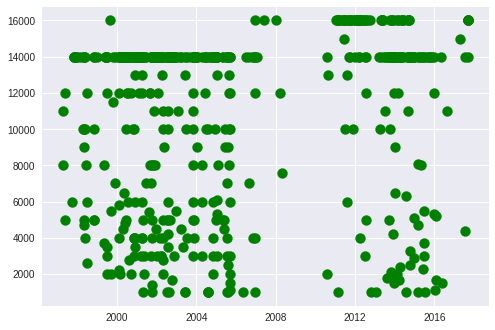

In [41]:
#part 2 question 3

#I am going to compare Start Times with Start Frequencies. My reasoning for this choice was I am curious if there was a specific time
#frame in which there were stronger solar flares, demonstarting a possible trend.

plt.style.use("seaborn")
plt.scatter(df2.Start_Time, df2.start_frequency, s = 100, c = "green", marker = "o")


plt.show()

#The results show a graph that is scattered all over the place. During some time frames there are a lot of solar flares but there start 
#frequency is all over the place (mid to late 2005). However, there are periods in which no flares were observed, for example in between 
#late 2008 and early 2010. It seems that there is also a lot of flares marked down with a start speed of 14000. In the website notes there
#are no explanations for why 14000, like if it is a default variable or just the most popular one. It is by far the most common
#start frequency regardless of start time.

#In conclusion, there doesn't seem to be any trend formed between start time and start frequency.
#There does seem to be some variance from the mean but it almost always is a lower start frequency, which is interesting. 

'191'